Подключаем нужные библиотеки

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Загружаем набор данных из CSV-файла. Ссылка: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

In [2]:
anime_df = pd.read_csv("anime.csv")

Выводим техническую информацию о наборе данных

In [3]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Возьмем в качестве переменной непрерывное значение rating

In [6]:
rating = anime_df["rating"]

Построим гистограмму

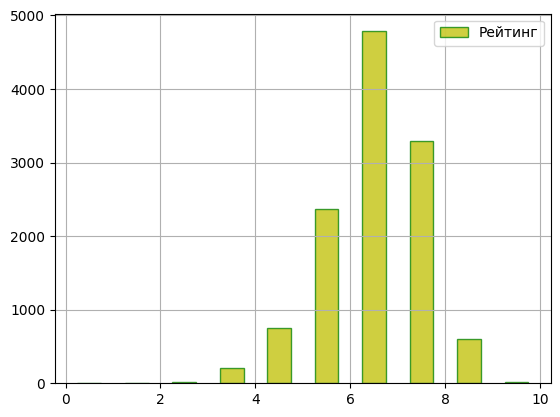

In [26]:
plt.hist(rating, bins = np.arange(0,11), rwidth = 0.5, edgecolor = "g", facecolor="y", alpha = 0.75, label = "Рейтинг")
plt.legend()
plt.grid(which="major")
plt.show()

График выше похож на нормальный вид распределения
Теперь построим boxplot (первые 50 записей rating)

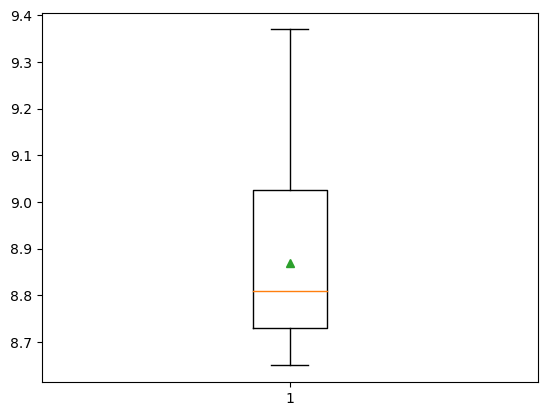

In [69]:
x = anime_df["rating"].head(50)
plt.boxplot(x, showmeans=True)
plt.show()

По гистограмме можно увидеть, что оценки между 0 и 4 встречаются реже всего (<500 записей), а чаще всего встречаются оценки между 6 и 8 (3000 - 5000 записей)
По боксплоту первых 50 записей рейтинга можно увидеть, что средняя оценка (по медиане) 8.8

Построим диаграмму рассеивания (показывает отношение rating к members по определенным типам)

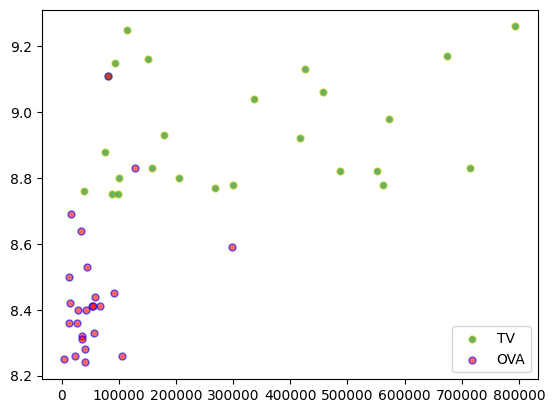

In [49]:
x1 = anime_df[anime_df["type"] == "TV"]["members"].head(25)
x2 = anime_df[anime_df["type"] == "OVA"]["members"].head(25)

y1 = anime_df[anime_df["type"] == "TV"]["rating"].head(25)
y2 = anime_df[anime_df["type"] == "OVA"]["rating"].head(25)

plt.scatter(x1, y1, 25, facecolor = "g", edgecolor = "y", alpha = 0.6, label = "TV")
plt.scatter(x2, y2, 25, facecolor = "r", edgecolor = "b", alpha = 0.6, label = "OVA")

plt.legend()

plt.show()

Гистограмма (members по определенным типам)

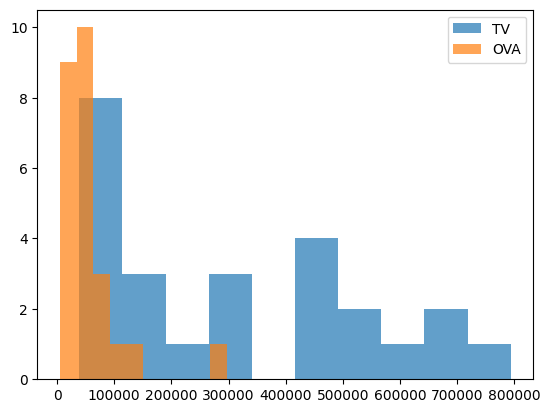

In [56]:
plt.hist(x1, alpha = 0.7, label = "TV")
plt.hist(x2, alpha = 0.7, label = "OVA")
plt.legend()
plt.show()

Построим матрицу корреляций

<Axes: >

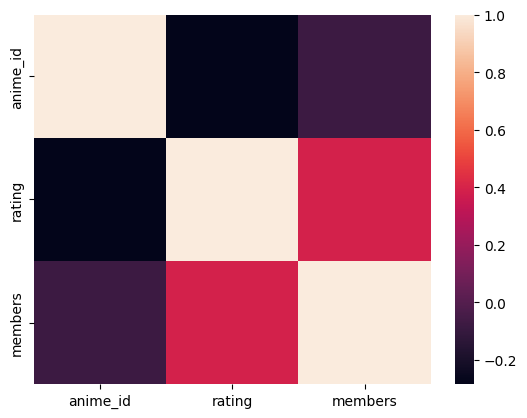

In [63]:
sns.heatmap(anime_df.corr(numeric_only = True))

Диаграмма рассеивания (по 25 записям): можно увидеть, что в среднем количество members у аниме с типом OVA <=100000, а рейтинг находится в диапазоне (8.2; 8.8). Количество members у аниме с типом TV находится в большом диапазоне (~30000; 800000), а рейтинг находится в диапазоне (8.7; 9.2+)
Гистограмма (по 25 записям): показывает количество аниме при определенном количестве members - при типе OVA большинство аниме находится в диапазоне (0; 150000), при типе TV широкий диапазон (~30000; 800000), сильно отличается лишь один столбец при количестве ~100000 members (8 штук)
Матрица корреляций: наибольшая взаимосвязь между переменными rating и members (значение ~0.4)

Возьмем категориальную переменную type (X) и непрерывную переменную rating (Y)

Построим гистограмму Y относительно X

<Axes: xlabel='type', ylabel='rating'>

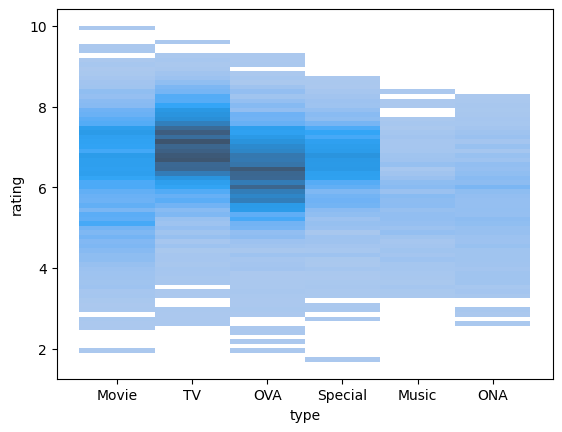

In [71]:
sns.histplot(data = anime_df, x = "type", y = "rating")

Построим диаграмму размаха относительно X

<Axes: xlabel='type', ylabel='rating'>

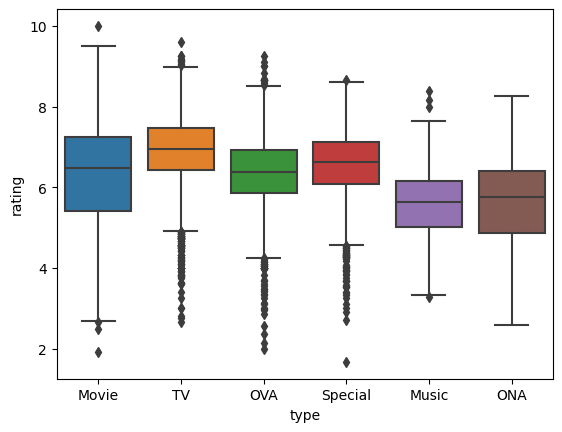

In [72]:
sns.boxplot(data = anime_df, x = "type", y = "rating")

Построим столбчатую диаграмму относительно X

<Axes: xlabel='type', ylabel='rating'>

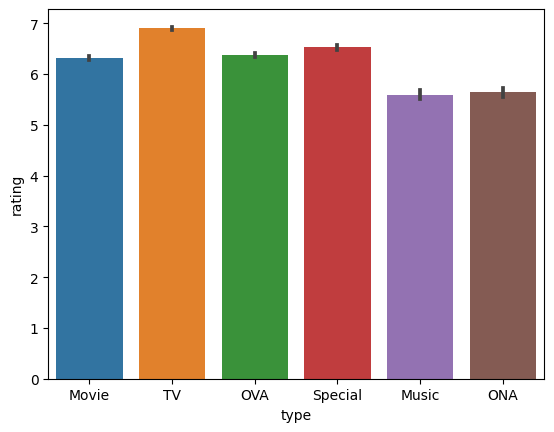

In [73]:
sns.barplot(data = anime_df, x = "type", y = "rating")

По гистограмме видно, что большинство аниме с типами Movie, TV, OVA и Special имеют рейтинг в диапазоне от 6 до 8 (у типов Music и ONA нет ярко выраженного диапазона рейтинга)
По боксплоту можно заметить медианное значение рейтинга по типам (Movie - ~6.5, TV - ~7, OVA - ~6.5, Special - ~7, Music - ~6, ONA - ~6)
Столбчатая диаграмма тоже показывает среднее значение рейтинга по типам

Здесь показана диаграмма рассеивания с отношением rating к members (по типам Movie, TV, OVA)

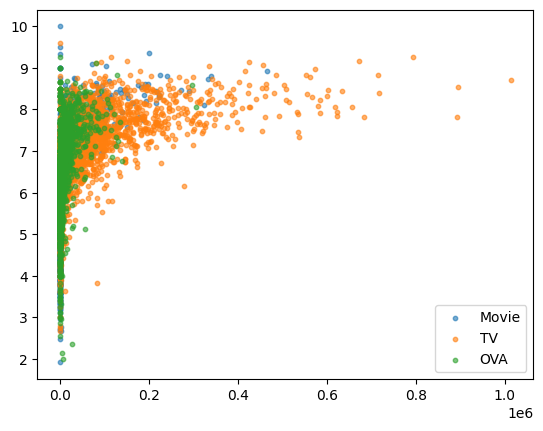

In [88]:
movie_members = anime_df[anime_df["type"] == "Movie"]["members"]
tv_members = anime_df[anime_df["type"] == "TV"]["members"]
ova_members = anime_df[anime_df["type"] == "OVA"]["members"]


movie_rating = anime_df[anime_df["type"] == "Movie"]["rating"]
tv_rating = anime_df[anime_df["type"] == "TV"]["rating"]
ova_rating = anime_df[anime_df["type"] == "OVA"]["rating"]


plt.scatter(movie_members, movie_rating, 10, alpha = 0.6, label = "Movie")
plt.scatter(tv_members, tv_rating, 10, alpha = 0.6, label = "TV")
plt.scatter(ova_members, ova_rating, 10, alpha = 0.6, label = "OVA")

plt.legend()

plt.show()

Здесь показана диаграмма рассеивания с отношением rating к members (по типам Special, Music, ONA)

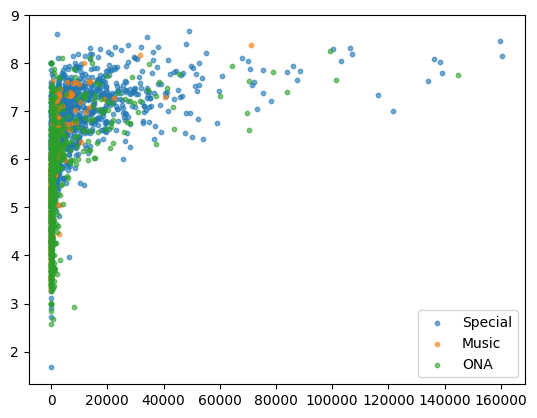

In [87]:
special_members = anime_df[anime_df["type"] == "Special"]["members"]
music_members = anime_df[anime_df["type"] == "Music"]["members"]
ona_members = anime_df[anime_df["type"] == "ONA"]["members"]

special_rating = anime_df[anime_df["type"] == "Special"]["rating"]
music_rating = anime_df[anime_df["type"] == "Music"]["rating"]
ona_rating = anime_df[anime_df["type"] == "ONA"]["rating"]

plt.scatter(special_members, special_rating, 10, alpha = 0.6, label = "Special")
plt.scatter(music_members, music_rating, 10, alpha = 0.6, label = "Music")
plt.scatter(ona_members, ona_rating, 10, alpha = 0.6, label = "ONA")

plt.legend()

plt.show()

Если посмотреть на обе диаграммы, то можно заметить, что когда средняя оценка аниме становится ближе к 7 и выше, то количество members (сколько раз аниме добавлено в избранное пользователями) у немалого количества аниме резко возрастает по сравнению с аниме с более низкими оценками